## Pergunta: Coloque um cabeçalho nesse notebook com o seu nome e resumindo o que descobriu ao explorar esses dados

### Aluno : Samuel Hericles Souza Silveira
    
### Data da realização: 07/06/2002

## Formação Data Science Alura - Análise exploratória do MovieLens

Na formação de Data Scienda www.alura.com.br um dos conjuntos de dados que utilizamos é o de avaliações para filmes no site MovieLens. Neste projeto faremos uma análise exploratória desses dados.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [256]:
# !pip install pandas=="0.24.0" --quiet
# !pip install seaborn=="0.9.0" --quiet
# !pip install scipy=="1.2.0" --quiet
# !pip install statsmodels
# !pip install matplotlib

In [257]:
import pandas as pd
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
from scipy.stats import shapiro # Teste shapiro-wilk avalia se as amostra se comportam em uma gaussiana.
from scipy.stats import  anderson # Teste que avaliar qual tipo de distribuição os dados se comportam.
from scipy.stats import normaltest # Teste D'Agostino ou K² teste, retorna um remuso estatístico dos dados

print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)


Usando pandas 1.0.4
Usando seaborn 0.9.0
Usando scipy 1.4.1


## Pergunta: carregue os filmes

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv` devem ser carregado em `filmes`
- renomeie as colunas para `filmeId`, `titulo` e `generos`
- configure o indice (`index`) para ser o `filmeId`

In [258]:
# solução
filmes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv')
filmes.columns = ['filmeId','titulo','generos']
filmes.set_index('filmeId',inplace=True)

In [259]:
filmes

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
...,...,...
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
193585,Flint (2017),Drama


In [260]:
print("Carregamos %d filmes" % len(filmes))
if(len(filmes) != 9742):
    print("ERRO! O conjunto de dados que estamos trabalhando nesse projeto possui 9742 elementos.")

Carregamos 9742 filmes


Vamos extrair o ano dos filmes (código já pronto): 

In [261]:
ano_de_lancamento = filmes.titulo.str.extract("\((\d{4})\)")
filmes['ano_de_lancamento'] = ano_de_lancamento.astype(float)
filmes.head()

,titulo,generos,ano_de_lancamento
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
5,Father of the Bride Part II (1995),Comedy,1995.0


## Pergunta: carregando as notas

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv` devem ser carregado em `notas`
- renomeie as colunas para `usuarioId`, `filmeId`, `nota` e `momento`

In [262]:
# solução
notas = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv')
notas.columns = ['usuarioId','filmeId','nota','momento']

In [263]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Pergunta: gere uma nova feature, a média dos votos por filme

- crie uma nova coluna chamada `nota_media` dentro do dataframe `filmes`

Dicas:
- como filmeId já é o indice de seu dataframe filmes, se você possui uma série com o número de votos por filme, basta atribuir uma nova coluna normalmente que será usado o mesmo índice

In [264]:
# solução
filme_por_nota = notas.groupby('filmeId').nota
media_do_filme = filme_por_nota.mean()
filmes['nota_media'] = media_do_filme

In [265]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.357143
5,Father of the Bride Part II (1995),Comedy,1995.0,3.071429


## Pergunta: remova os filmes com menos de 50 avaliações

- conte o número de notas por filme
- adicione uma coluna nova chamada `total_de_votos` a `filmes` que representa o número de avaliações que aquele filme teve no conjunto de dados
- remova os que tem 49 ou menos de `filmes`

## Solução

In [266]:
# solução para calcular o total de votos por filme
total_de_votos = notas['filmeId'].value_counts()
filmes['total_de_votos'] = total_de_votos

In [267]:
# solução para criar a nova coluna e filtrar os filmes
index_filmes_menos_50 = filmes.query('total_de_votos < 50').index
index_filmes_menos_50
filmes.drop(index = index_filmes_menos_50,inplace=True)
filmes.dropna(inplace=True)
filmes

,titulo,generos,ano_de_lancamento,nota_media,total_de_votos
filmeId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818,110.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615,52.0
6,Heat (1995),Action|Crime|Thriller,1995.0,3.946078,102.0
7,Sabrina (1995),Comedy|Romance,1995.0,3.185185,54.0
...,...,...,...,...,...
109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,2014.0,3.778846,52.0
109487,Interstellar (2014),Sci-Fi|IMAX,2014.0,3.993151,73.0
112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,2014.0,4.050847,59.0


In [268]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media,total_de_votos
filmeId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818,110.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615,52.0
6,Heat (1995),Action|Crime|Thriller,1995.0,3.946078,102.0
7,Sabrina (1995),Comedy|Romance,1995.0,3.185185,54.0


# Visualizando os dados gerais

## Pergunta: Visualize as notas médias

- histograma
- cummulative distribution function

Dicas:

- lembre-se de colocar um título nas imagens além de nomes nos eixos x e y
- para gerar a versão cumulativa lembre-se de usar os parâmetros `hist_kws` e `kde_kws` para definir `'cumulative'=True`

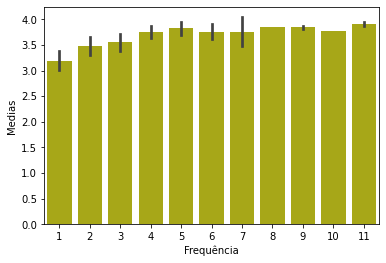

In [269]:
medias = filmes['nota_media'].round(2).value_counts().index.transpose()
freq_medias = filmes['nota_media'].round(2).value_counts().values.transpose()
colunas = {'Medias':medias,'Frequência':freq_medias}
medias_das_notas = pd.DataFrame(data=colunas)
medias_das_notas.set_index('Medias')    
sns.barplot(x="Frequência",y="Medias",data=medias_das_notas,color='y')


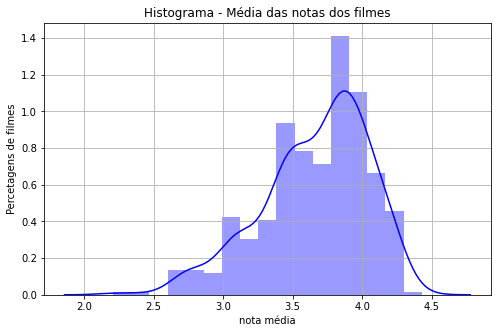

In [270]:
# solução histograma
plt.figure(figsize=(8,5))
ax = sns.distplot(filmes['nota_media'],color='blue')
ax.set(xlabel = 'nota média', ylabel='Percetagens de filmes',title="Histograma - Média das notas dos filmes")
ax.grid()

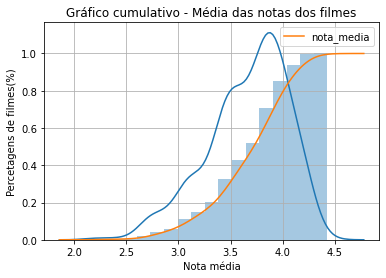

In [271]:
# solução cumulativa
kwargs = {'cumulative':True}
ax = sns.distplot(filmes['nota_media'],hist_kws=kwargs)
ax = sns.kdeplot(filmes['nota_media'],cumulative=True)
ax.set(xlabel = 'Nota média', ylabel='Percetagens de filmes(%)',title="Gráfico cumulativo - Média das notas dos filmes")
ax.grid()

## Pergunta: Visualize o total de votos

- histograma
- cummulative distribution function

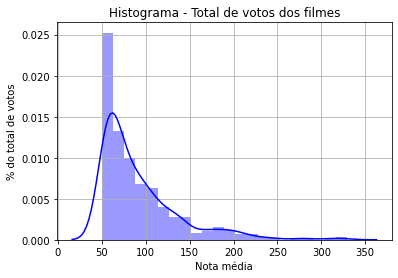

In [272]:
# solução histograma
ax = sns.distplot(filmes['total_de_votos'],color='blue')
ax.set(xlabel = 'Nota média', ylabel='% do total de votos',title="Histograma - Total de votos dos filmes")
ax.grid()

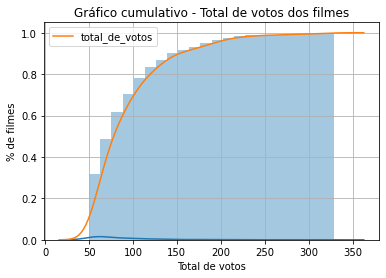

In [273]:
# solução cumulativa
kwargs = {'cumulative':True}
ax = sns.distplot(filmes['total_de_votos'],hist_kws=kwargs)
ax = sns.kdeplot(filmes['total_de_votos'],cumulative=True)
ax.set(xlabel = 'Total de votos', ylabel='% de filmes',title="Gráfico cumulativo - Total de votos dos filmes")
ax.grid()

## Pergunta: 20% dos filmes do dataframe tem nota maior que? 

- lembre-se da função `quantile` do pandas

In [274]:
# solução
nota_limite_dos_20_porcento = filmes['nota_media'].quantile(0.2)
nota_limite_dos_20_porcento

3.3742857142857146

In [275]:
print("20 porcento dos filmes tem nota maior que de %.2f" % nota_limite_dos_20_porcento)

20 porcento dos filmes tem nota maior que de 3.37


## Vamos separar a coluna `generos` em diversas colunas.

- O código já está pronto.

In [276]:
filmes['generos'] = filmes['generos'].str.replace('-', '')
generos = filmes['generos'].str.get_dummies()
print("Temos %d generos distintos" % generos.shape[1])

Temos 19 generos distintos


In [277]:
filmes = filmes.join(generos).drop(columns=['generos'], axis=1)
filmes.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.920930,215.0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995.0,3.431818,110.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995.0,3.259615,52.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6,Heat (1995),1995.0,3.946078,102.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7,Sabrina (1995),1995.0,3.185185,54.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


## Pergunta: visualização de quantos filmes existem por genero

- Para cada um dos generos você deve agrupar o número de filmes
- Ordene as barras, na esquerda o genero com mais filmes, na direita o que tem menos filmes

Dica:

- Para fazer a soma de uma ou mais colunas individualmente você pode usar `seu_dataframe.sum()`
- Não precisa usar o dataframe `filmes`, somente o dataframe `generos`
- Em certas situações é mais fácil usar as funções de plotagem do pandas ao invés do seaborn

In [278]:
filmes.columns

Index(['titulo', 'ano_de_lancamento', 'nota_media', 'total_de_votos', 'Action',
       'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'FilmNoir', 'Horror', 'IMAX', 'Musical', 'Mystery',
       'Romance', 'SciFi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [279]:
# solução
genero = ['Action','Adventure', 'Animation', 'Children',
           'Comedy', 'Crime', 'Documentary', 'Drama',
           'Fantasy', 'FilmNoir', 'Horror', 'IMAX',
           'Musical', 'Mystery','Romance', 'SciFi',
           'Thriller', 'War', 'Western']
quantidade_de_filmes_por_genero = []
for i in genero:
    quantidade_de_filmes_por_genero.append(filmes[i].sum())
df_freq_filmes = pd.DataFrame({'Genero':genero,
                               'Frequencia':quantidade_de_filmes_por_genero})
df_popularidade = df_freq_filmes
df_freq_filmes = df_freq_filmes.sort_values('Frequencia',ascending=False)
df_freq_filmes.reset_index(drop=True, inplace=True)
df_freq_filmes.head()

,Genero,Frequencia
0,Comedy,181
1,Drama,166
2,Action,164
3,Adventure,132
4,Thriller,121


Text(0.5, 1.0, 'Frequências de filmes por gênero')

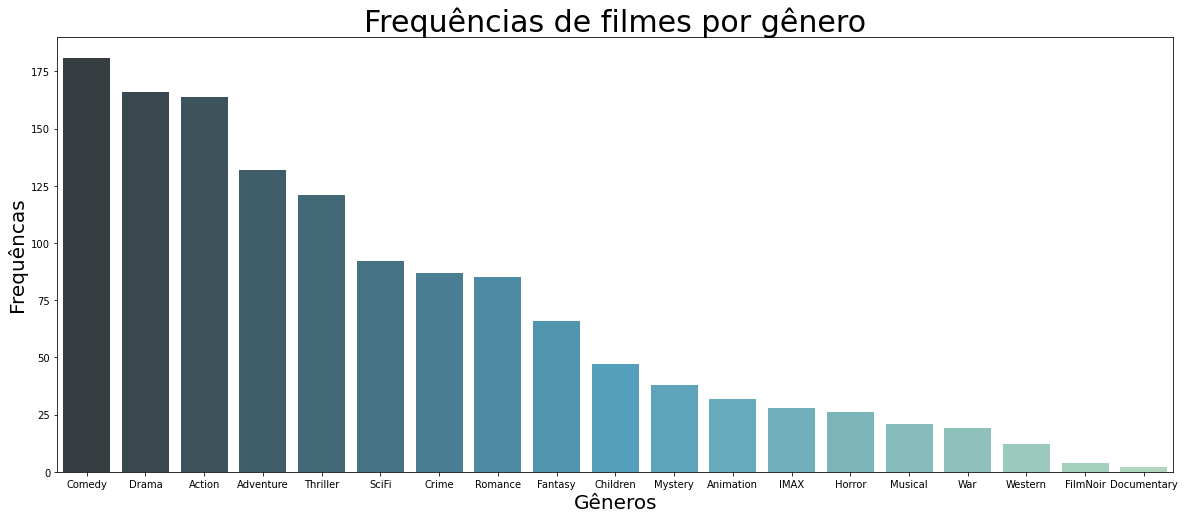

In [280]:
plt.figure(figsize=(20,8))
ax = sns.barplot(x="Genero",y="Frequencia",data=df_freq_filmes,palette='GnBu_d')
ax.set_xlabel('Gêneros',fontsize=20)
ax.set_ylabel('Frequêncas',fontsize=20)
ax.set_title('Frequências de filmes por gênero',fontsize=30)

## Pergunta: Quais são os 5 generos com mais filmes?

Dica:

- `sort_values()` pode ordenar uma Series do pandas

In [281]:
# solução
top5_generos_em_quantidade_de_filmes = df_freq_filmes.head()

In [282]:
print(top5_generos_em_quantidade_de_filmes)

      Genero  Frequencia
0     Comedy         181
1      Drama         166
2     Action         164
3  Adventure         132
4   Thriller         121


## Pergunta: visualização de votos por genero

- o código que gera os votos por genero já está pronto
- ordene as categorias da mais visualizada para a menos visualizada
- gere a visualização por genero

In [283]:
votos_por_genero_por_filme = pd.DataFrame((generos.values.T * filmes['total_de_votos'].values).T, columns = generos.columns)
votos_por_genero_por_filme.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0.0,215.0,215.0,215.0,215.0,0.0,0.0,0.0,215.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,110.0,0.0,110.0,0.0,0.0,0.0,0.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0
3,102.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0
4,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0


In [284]:
# solucão
total_de_votos = []
for i in votos_por_genero_por_filme.columns:
    total_de_votos.append(votos_por_genero_por_filme[i].sum())
df_popularidade['total_de_votos'] = total_de_votos
total_de_votos

[15734.0,
 13117.0,
 3066.0,
 4331.0,
 15330.0,
 8649.0,
 108.0,
 15445.0,
 5993.0,
 291.0,
 2215.0,
 2492.0,
 1822.0,
 3452.0,
 7444.0,
 8989.0,
 11907.0,
 2113.0,
 900.0]

In [285]:
# solução
qt_de_votos_por_generos = pd.DataFrame({'Genero':votos_por_genero_por_filme.columns,
                                        'Total de votos':total_de_votos})
qt_de_votos_por_generos.reset_index(drop=True, inplace=True)
qt_de_votos_por_generos.sort_values('Total de votos',ascending=False,inplace=True)
qt_de_votos_por_generos.head()

,Genero,Total de votos
0,Action,15734.0
7,Drama,15445.0
4,Comedy,15330.0
1,Adventure,13117.0
16,Thriller,11907.0


Text(0.5, 1.0, 'Quantidade de votos por gênero')

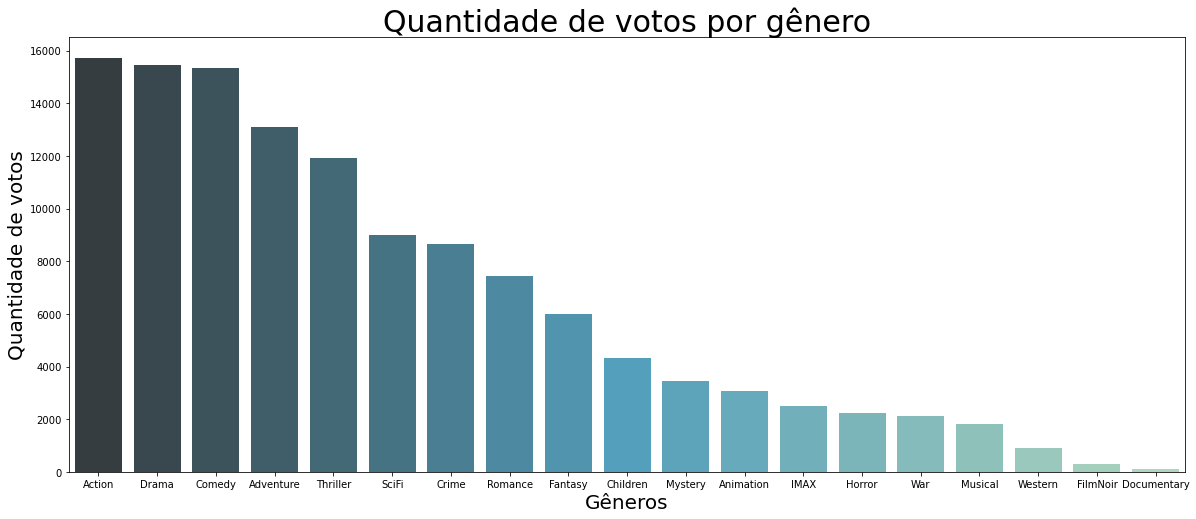

In [286]:
plt.figure(figsize=(20,8))
ax = sns.barplot(x="Genero",y="Total de votos",data=qt_de_votos_por_generos,palette='GnBu_d')
ax.set_xlabel('Gêneros',fontsize=20)
ax.set_ylabel('Quantidade de votos',fontsize=20)
ax.set_title('Quantidade de votos por gênero',fontsize=30)

## Pergunta : votos por filme por genero

Queremos entender a quantidade de votos em relação a quantidade de filmes existentes naquele genero.

Por exemplo: 
- se temos 1000 votos de `Ação` e 10 filmes desse genero, foram 100 votos por filme nesse genero.
- se o gênero `Documentário` tem 2 filmes e 500 votos, ele tem 250 votos por filme nesse gênero.

Queremos entender isso, a "popularidade" média de um filme em cada categoria, isto é, o número de votos dividido pelo número de filmes, organizado para cada categoria.

- Você já possui o número de votos por genero
- Calcule o número de votos por genero dividido pelo total de filmes por genero
- Ordene do maior para o menor
- Plote um gráfico para visualizarmos esses dados

In [287]:
# solucao código
df_popularidade['Voto/Filme'] = df_popularidade['total_de_votos']/df_popularidade['Frequencia']
df_popularidade.sort_values('Voto/Filme',ascending=False, inplace=True)

Text(0.5, 1.0, 'Votos por filme por genero')

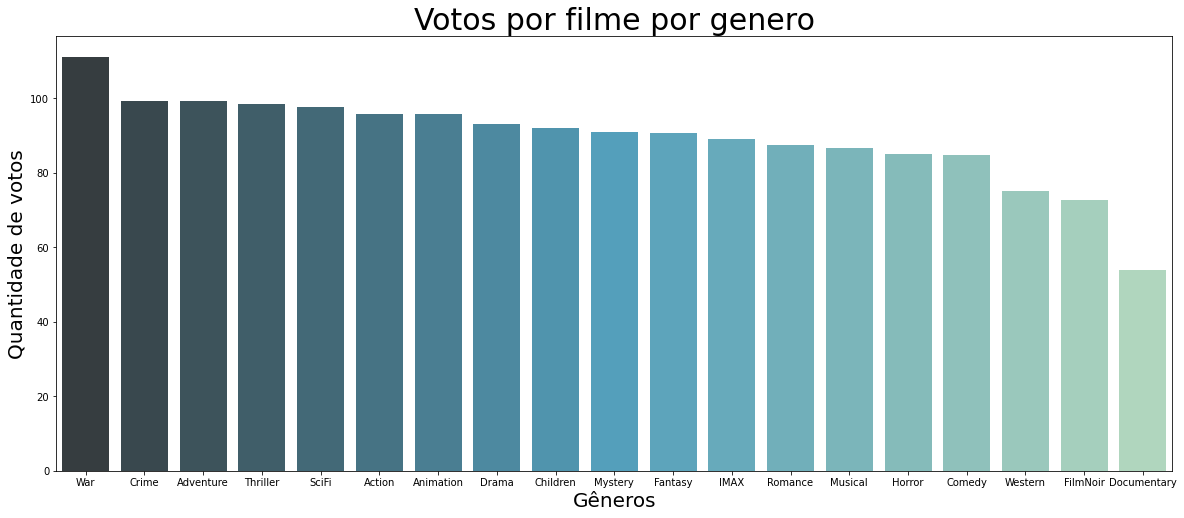

In [288]:
# solução com visualização 
plt.figure(figsize=(20,8))
ax = sns.barplot(x="Genero",y="Voto/Filme",data=df_popularidade,palette='GnBu_d')
ax.set_xlabel('Gêneros',fontsize=20)
ax.set_ylabel('Quantidade de votos',fontsize=20)
ax.set_title('Votos por filme por genero',fontsize=30)

## Pergunta: Olhando as 3 últimas visualizações o que você conclui sobre os generos `Action` e `War`?

In [289]:
df_popularidade

,Genero,Frequencia,total_de_votos,Voto/Filme
17,War,19,2113.0,111.210526
5,Crime,87,8649.0,99.413793
1,Adventure,132,13117.0,99.371212
16,Thriller,121,11907.0,98.404959
15,SciFi,92,8989.0,97.706522
0,Action,164,15734.0,95.939024
2,Animation,32,3066.0,95.812500
7,Drama,166,15445.0,93.042169
3,Children,47,4331.0,92.148936
13,Mystery,38,3452.0,90.842105


### Solução (texto livre):
    
    A nota do gênero Action é mais confiavel, pois houve mais pessoas vontado nesse estilo de filme. Logo, ocorre o contrário no genêro War porque ele recebe o valor valor em Voto/Filmes, mas só há 19 filmes e mais de 2000 votos. Além disso, vemos que os usuários gostam mais de filmes de ação, por conta que há mais filmes nessa categoria.
    

## Pergunta: Crie 2 boxplots no mesmo plot comparando a coluna `total_de_votos` dos filmes de categoria `Horror` e `Adventure`  

Dica:

- as vezes é mais fácil usar o boxplot do matplotlib ao invés do seaborn
- plt.boxplot suporta o parâmetro labels com uma lista de nomes para cada boxplot plotado

{'whiskers': [<matplotlib.lines.Line2D at 0x19c5d7f0>,
 'caps': [<matplotlib.lines.Line2D at 0x19c5db50>,
 'boxes': [<matplotlib.lines.Line2D at 0x19c5d640>,
 'medians': [<matplotlib.lines.Line2D at 0x19c5deb0>,
 'fliers': [<matplotlib.lines.Line2D at 0x19c68058>,
 'means': []}

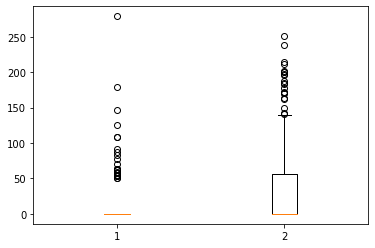

In [290]:
# solução:
plt.boxplot([votos_por_genero_por_filme['Horror'],votos_por_genero_por_filme['Adventure']])

## Pergunta: mostre agora um boxplot para cada uma das categorias

Dica:
- use generos.columns para acessar todos os gêneros
- já removemos os hífens dos nomes das colunas quando criamos as colunas de gêneros
- plt (pyplot) do matplotlib suporta a função xticks(rotation=90) para rotacionar os labels

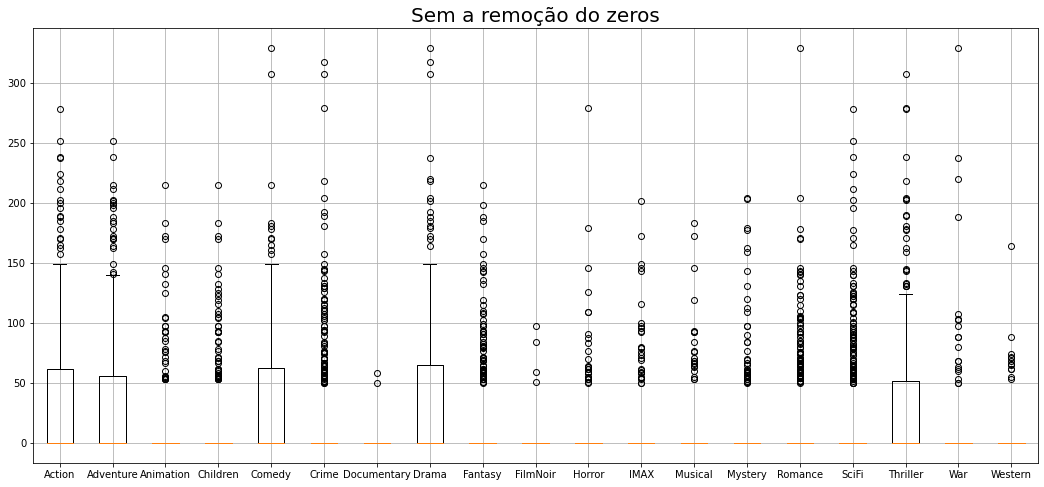

In [291]:
plt.figure(figsize=(18,8))
plt.boxplot(votos_por_genero_por_filme[generos.columns.values].transpose())
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], generos.columns.values)
plt.title("Sem a remoção do zeros",fontsize=20)
plt.grid()

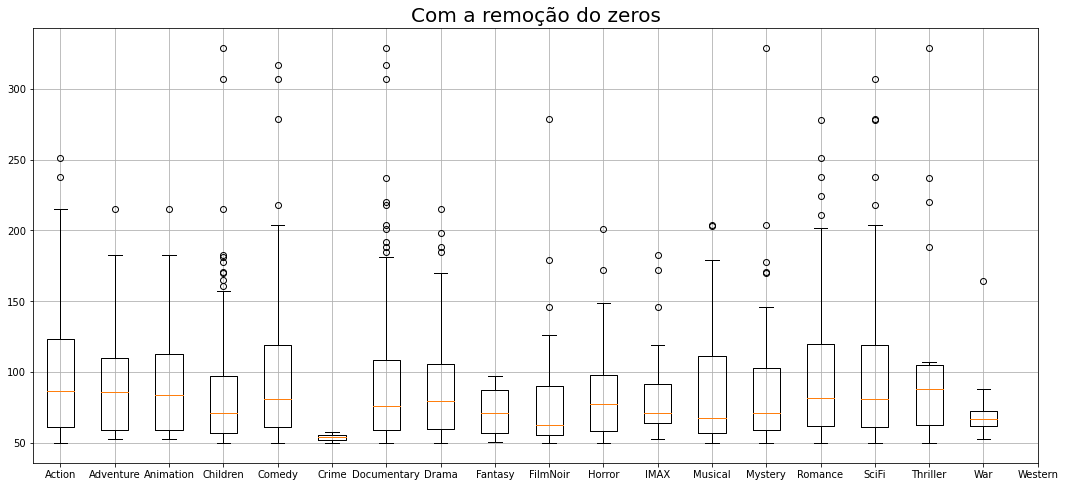

In [292]:
a = []
for i in generos.columns.values:
    a.append(votos_por_genero_por_filme[i].values)
b = []
for i in range(1,19):
    b.append(a[i][a[i]>0].transpose())

plt.figure(figsize=(18,8))
plt.boxplot(b)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], generos.columns.values)
plt.title("Com a remoção do zeros",fontsize=20)
plt.grid()

## Pergunta: desejo criar um filme com somente um dos gêneros: `Horror` ou `Adventure`. Quero ter uma chance maior de ter um faturamento que pague minhas contas, mesmo que não seja um super sucesso absurdo de vendas. Qual dos 2 gêneros você sugere?

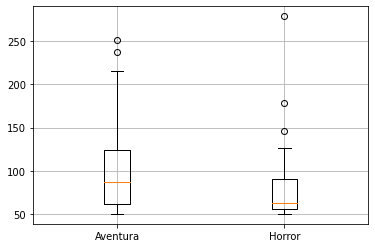

In [293]:
Aventura = votos_por_genero_por_filme['Adventure']
Horror = votos_por_genero_por_filme['Horror']

plt.boxplot([Aventura[Aventura>0],Horror[Horror>0]])
plt.xticks([1,2], ['Aventura','Horror'])
plt.grid()

### Solução:
    Cria um filme de aventura! pois há um público maior nele(com base no total de votos), e você tem uma maior chance de obter uma boa nota conforme é visto no boxplot acima. Além disso,a mediana é mais proxima da média e a maior parte dos filmes são muito votados, ou seja, tem mais chance de serem vistos.


## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição dos votos dos filmes de `Adventure` e `Horror`. Sua recomendação continua a mesma? Explique.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

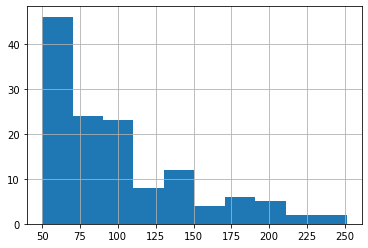

In [294]:
# solucao histograma de aventura

# Retirando os zeros no conjunto temos:
Aventura[Aventura>0].hist()

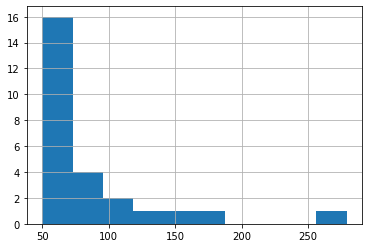

In [295]:
# solucao histograma de horror

# Retirando os zeros no conjunto temos:
Horror[Horror>0].hist()

In [296]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo

# Teste de shapiro
def teste_shapiro(dados):
    stat,p = shapiro(dados)
    alfa  =  0.05 
    if  p  >  alfa : 
        msg  =  'Teste de shapiro - A amostra parece gaussiana (falha ao rejeitar H0)' 
    else : 
        msg  =  'Teste de shapiro - A amostra não parece gaussiana (rejeita H0)'
    print(msg)
    return stat,p

def teste_anderson(dados):
    result = anderson(dados)
    stat = round(result.statistic, 4)
    p = 0
    result_mat = []
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            msg = 'Teste de anderson - A amostra parece gaussiana (não rejeita H0)'
        else:
            msg = 'Teste de anderson - A amostra não parece gaussiana (rejeita H0)'
        result_mat.append([len(dados), stat, sl, cv, msg])
    print(msg)
    
def test_dagostino(dados):
    stat, p = normaltest(dados)
    alpha = 0.05
    if p > alpha:
        msg = "Teste de D'Agostino - A amostra parece gaussiana (não rejeita H0)"
    else:
        msg = "Teste de D'Agostino - A amostra não parece gaussiana (rejeita H0)"
    print(msg)

In [297]:
# solução com o teste desejado

teste_shapiro(Aventura[Aventura>0])
teste_anderson(Aventura[Aventura>0])
test_dagostino(Aventura[Aventura>0])
print("*" * 80)
teste_shapiro(Horror[Horror>0])
teste_anderson(Horror[Horror>0])
test_dagostino(Horror[Horror>0])

Teste de shapiro - A amostra não parece gaussiana (rejeita H0)
Teste de anderson - A amostra não parece gaussiana (rejeita H0)
Teste de D'Agostino - A amostra não parece gaussiana (rejeita H0)
********************************************************************************
Teste de shapiro - A amostra não parece gaussiana (rejeita H0)
Teste de anderson - A amostra não parece gaussiana (rejeita H0)
Teste de D'Agostino - A amostra não parece gaussiana (rejeita H0)


### Solução (explique sua conclusão):

    Não foi necessário realizar os testes para saber que as duas distribuições não são gaussiana, mas utilizei da matemática para ter como aliada. Logo, esses dados foram retirados a partir de uma coleta de dados com viés, que podemos citar a preferência dos usuários por um certa categoria de filmes ou o número de filmes disponveis em um determinado tipo.

    Portanto, minha sugestão ainda fica a mesma e também posso adicionar que os filmes de aventura tem mais chances de ser um preferências dos usuários da plataforma.


## Pergunta: Faça os mesmos boxplots para as notas médias (`nota_media`) dos gêneros `Adventure` e `Horror`.

In [298]:
# solução:
nota_media_horror = filmes.query('Horror==1').nota_media
nota_media_aventura = filmes.query('Adventure==1').nota_media

{'whiskers': [<matplotlib.lines.Line2D at 0x1b1c3118>,
 'caps': [<matplotlib.lines.Line2D at 0x1b1c3478>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b1b5f40>,
 'medians': [<matplotlib.lines.Line2D at 0x1b1c37d8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1b1c3958>,
 'means': []}

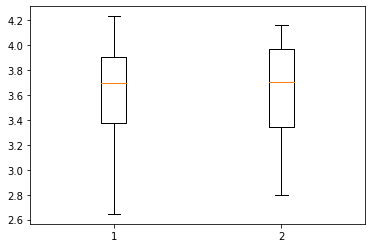

In [299]:
plt.boxplot([nota_media_aventura,nota_media_horror])

## Pergunta: Quero fazer um filme que seja sucesso de crítica, com pessoas dando notas altas, mesmo que não tenha um número muito grande de pessoas assistindo. Qual gênero você recomenda se tenho que escolher somente um entre `Adventure` e `Horror`?

### Solução:
    Horror, pois há uma maior chance do que receber notas mais altas com filmes desse tipo. Veja no boxplot acima, a distribuição da categoria horror é mais densa nos intervalos [3.4, 4.0] e os filmes de aventura no [3.4, 3.8].


## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição das notas dos filmes de `Adventure` e `Horror`.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

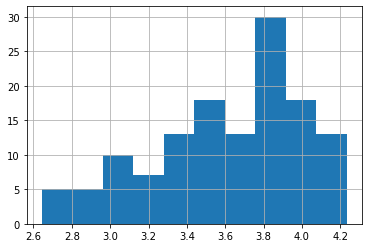

In [300]:
# solucao histograma de aventura
nota_media_aventura.hist()

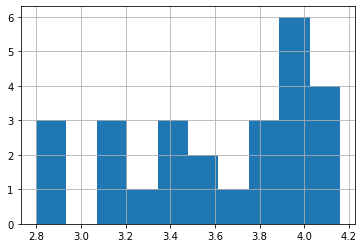

In [301]:
# solucao histograma de horror
nota_media_horror.hist()

In [302]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
teste_shapiro(nota_media_horror)
teste_anderson(nota_media_horror)
test_dagostino(nota_media_horror)
print("*" * 80)
teste_shapiro(nota_media_aventura)
teste_anderson(nota_media_aventura)
test_dagostino(nota_media_aventura)

Teste de shapiro - A amostra não parece gaussiana (rejeita H0)
Teste de anderson - A amostra parece gaussiana (não rejeita H0)
Teste de D'Agostino - A amostra parece gaussiana (não rejeita H0)
********************************************************************************
Teste de shapiro - A amostra não parece gaussiana (rejeita H0)
Teste de anderson - A amostra não parece gaussiana (rejeita H0)
Teste de D'Agostino - A amostra não parece gaussiana (rejeita H0)


### Solução com o teste desejado => Explicação dos resultados

    Não foi necessário realizar os testes para saber que as duas distribuições não são gaussiana, mas utilizei da matemática para ter como aliada. Logo, esses dados foram retirados a partir de uma coleta de dados com viés, que podemos citar a preferência dos usuários por um certa categoria de filmes ou o número de filmes disponveis em um determinado tipo.

## Sua recomendação para maior sucesso de crítica em nota alta entre `Horror` e `Adventure` continua a mesma? Explique.



### Solução:

    Não, pois vendo que a categoria de filmes Adventure se mostrou que suas amostras se comportam como uma gaussiana em dois dos três testes. Além disso, segundo o histograma do filme de aventuras, vemos que boa parte dos filmes esta no intervalo [3.4, 4.0].
    

## Pergunta: Quero fazer um filme que seja primeiro sucesso de crítica, com pessoas dando notas altas. Em segundo lugar quero que seja popular (mais pessoas assistam). Com as informações visuais e estatísticas, supondo poder escolher somente um, qual dois 2 gêneros você recomenda agora? `Horror` ou `Adventure`?

### Solução:

    Pelos os testes anteriores, vemos que o mais aconselhado é fazer filmes de aventura(Adventure).


## Pergunta: Quais são os top 5 filmes dos 2 generos mais assistidas?

- utilize os 2 generos mais votados em `votos_por_genero`
- utilize a `nota_media` para definir o top 5 filmes
- o resultado são 5, não 10 filmes

In [303]:
aux = df_popularidade.sort_values('total_de_votos',ascending=False)
votos_por_genero = aux.iloc[[0,1]]

In [304]:
# solução: calculando os 2 generos mais votados
votos_por_genero

,Genero,Frequencia,total_de_votos,Voto/Filme
0,Action,164,15734.0,95.939024
7,Drama,166,15445.0,93.042169


In [305]:
# solução: encontrando os top 5 filmes desses generos
top5_action = filmes.query('Action == 1').sort_values('nota_media',ascending=False)
top5_action.iloc[[0,1,2,3,4]]

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,
2959,Fight Club (1999),1999.0,4.272936,218.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
58559,"Dark Knight, The (2008)",2008.0,4.238255,149.0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1197,"Princess Bride, The (1987)",1987.0,4.232394,142.0,1,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
260,Star Wars: Episode IV - A New Hope (1977),1977.0,4.231076,251.0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1208,Apocalypse Now (1979),1979.0,4.219626,107.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [306]:
top5_drama = filmes.query('Drama == 1').sort_values('nota_media',ascending=False)
top5_drama.iloc[[0,1,2,3,4]]

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,
318,"Shawshank Redemption, The (1994)",1994.0,4.429022,317.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
858,"Godfather, The (1972)",1972.0,4.289062,192.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2959,Fight Club (1999),1999.0,4.272936,218.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1276,Cool Hand Luke (1967),1967.0,4.271930,57.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1221,"Godfather: Part II, The (1974)",1974.0,4.259690,129.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Pergunta: Quais são os 2 generos com maior valor de correlação com a `nota_media`? E os 2 com menor valor de correlação com a `nota_media`?

- O pandas possui a função `corr` para calcular correlação entre todas as colunas

In [307]:
aux = filmes.corr().sort_values('nota_media',ascending=False)['nota_media']
aux

nota_media           1.000000
total_de_votos       0.342584
Drama                0.277662
Crime                0.190220
Mystery              0.129914
War                  0.125615
FilmNoir             0.081766
IMAX                 0.064931
Animation            0.043071
Documentary         -0.003486
Musical             -0.008529
Thriller            -0.016782
Fantasy             -0.020986
Children            -0.030360
Horror              -0.033877
Western             -0.059642
Romance             -0.072002
Adventure           -0.079985
SciFi               -0.136717
Action              -0.154089
ano_de_lancamento   -0.159146
Comedy              -0.256005
Name: nota_media, dtype: float64

In [308]:
# solucao
print("As duas categorias com maiores correlação são Drama({}) e Crime({})".format(aux[2].round(2),aux[3].round(2)))
print("*"*80)
print("As duas categorias com Menores correlação são Documentário({}) e Musical({})".format(aux[9].round(3),aux[10].round(2)))

As duas categorias com maiores correlação são Drama(0.28) e Crime(0.19)
********************************************************************************
As duas categorias com Menores correlação são Documentário(-0.003) e Musical(-0.01)


## Pergunta: Quais são os 2 generos com maior valor de correlação com `total_de_votos`? E quais os 2 com menor valor de correlação com `total_de_votos`?

In [309]:
aux = filmes.corr().sort_values('total_de_votos',ascending=False)['total_de_votos']
aux

total_de_votos       1.000000
nota_media           0.342584
Adventure            0.104380
War                  0.087999
Thriller             0.085525
Crime                0.079766
Action               0.066239
SciFi                0.063802
Animation            0.023442
Drama                0.018779
Children             0.001764
Mystery             -0.007051
Fantasy             -0.009976
IMAX                -0.016285
Musical             -0.024741
ano_de_lancamento   -0.028709
Horror              -0.036132
FilmNoir            -0.039408
Romance             -0.045427
Documentary         -0.055010
Western             -0.060789
Comedy              -0.128527
Name: total_de_votos, dtype: float64

In [310]:
# solucao
print("As duas categorias com maiores correlação são Aventura({}) e Guerra({})".format(aux[2].round(2),aux[3].round(2)))
print("*"*80)
print("As duas categorias com Menores correlação são Infantil({}) e Mistério({})".format(aux[10].round(3),aux[11].round(3)))

As duas categorias com maiores correlação são Aventura(0.1) e Guerra(0.09)
********************************************************************************
As duas categorias com Menores correlação são Infantil(0.002) e Mistério(-0.007)


## Pergunta: Visualize graficamente o relacionamento entre ano de lançamento e nota média

- Use o gráfico `lineplot`

Text(0.5, 1.0, 'Gráfico que mostra a correlação entre nota média e ana de lançamento')

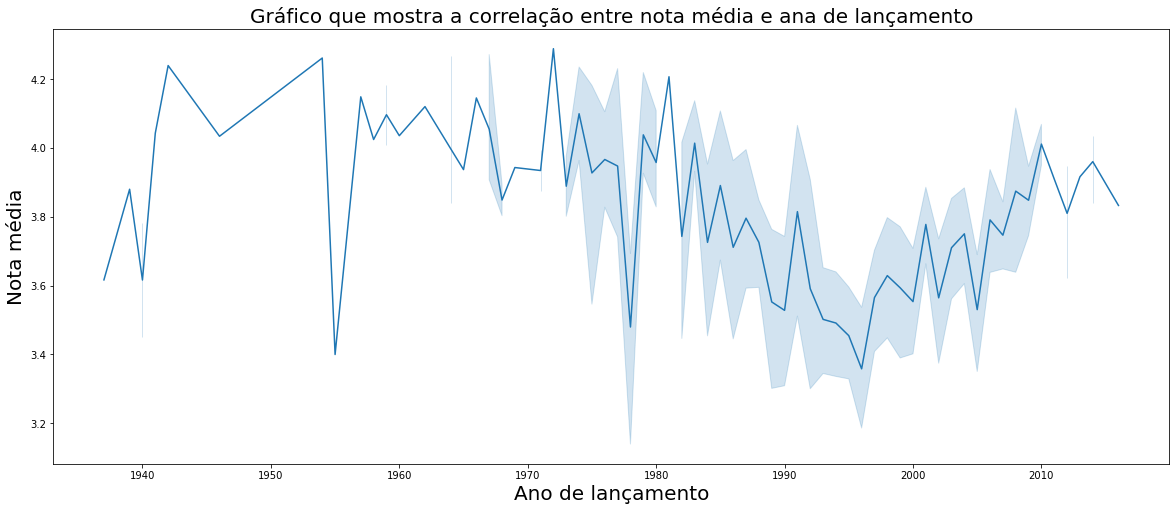

In [311]:
# solucao
total_de_votos_e_ano_lan_values = filmes[['nota_media','ano_de_lancamento']]
plt.figure(figsize=(20,8))
ax = sns.lineplot(x='ano_de_lancamento',y='nota_media',data=total_de_votos_e_ano_lan_values)
ax.set_xlabel('Ano de lançamento',fontsize=20)
ax.set_ylabel('Nota média',fontsize=20)
ax.set_title('Gráfico que mostra a correlação entre nota média e ana de lançamento',fontsize=20)

## Pergunta: Interprete a correlação entre `ano_de_lancamento` e a `nota_media`?

- Calcule a correlação numericamente (use o `corr` do pandas)
- Correlação não implica causalidade, qual "problema" na coleta dos dados pode gerar esse tipo de correlação?

In [312]:
# solução (código)
corr_total_de_votos_e_ano_lan_values = filmes[['nota_media','ano_de_lancamento']].corr()
corr_total_de_votos_e_ano_lan_values

,nota_media,ano_de_lancamento
nota_media,1.000000,-0.159146
ano_de_lancamento,-0.159146,1.000000


Text(0.5, 1.0, 'Gráfico que mostra a correlação entre nota média e ana de lançamento')

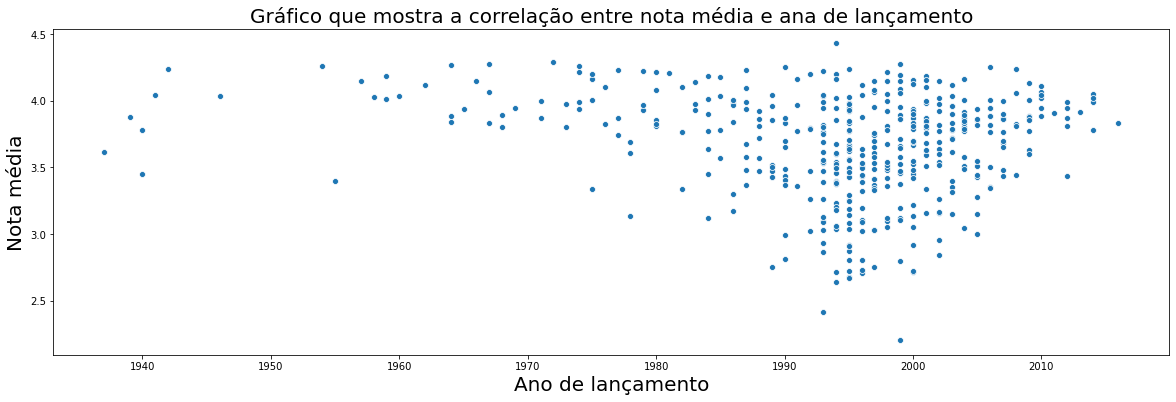

In [313]:
plt.figure(figsize=(20,6))
ax = sns.scatterplot(x='ano_de_lancamento',y='nota_media',data=total_de_votos_e_ano_lan_values)
ax.set_xlabel('Ano de lançamento',fontsize=20)
ax.set_ylabel('Nota média',fontsize=20)
ax.set_title('Gráfico que mostra a correlação entre nota média e ana de lançamento',fontsize=20)

### Solução (explicação)

    O que podemos ver que a há mais filmes entre as decadas de 1990 e 2010 e isso causa o baixo valor de correlação(próximo a zero).


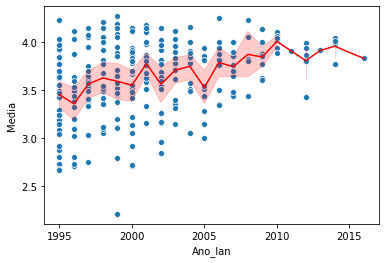

In [314]:
ano_lan = []
media = []
for i in range(len(filmes[['nota_media','ano_de_lancamento']])):
    if filmes[['nota_media','ano_de_lancamento']].iloc[i].values[1] > 1994:
        ano_lan.append(filmes['ano_de_lancamento'].iloc[i])
        media.append(filmes['nota_media'].iloc[i])
decada_de_90_pra_frente = pd.DataFrame({'Ano_lan':ano_lan,'Media':media})
ax = sns.scatterplot(x="Ano_lan",y="Media",data=decada_de_90_pra_frente)
ax = sns.lineplot(x="Ano_lan",y="Media",data=decada_de_90_pra_frente,color='red')

In [315]:
decada_de_90_pra_frente.corr()

,Ano_lan,Media
Ano_lan,1.000000,0.348603
Media,0.348603,1.000000


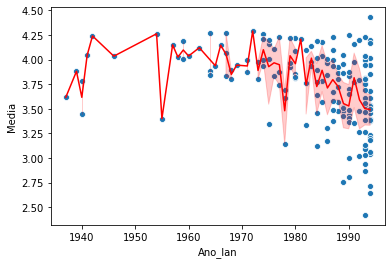

In [316]:
ano_lan = []
media = []
for i in range(len(filmes[['nota_media','ano_de_lancamento']])):
    if ~(filmes[['nota_media','ano_de_lancamento']].iloc[i].values[1] > 1994):    
        ano_lan.append(filmes['ano_de_lancamento'].iloc[i])
        media.append(filmes['nota_media'].iloc[i])
        
decada_de_90_pra_tras = pd.DataFrame({'Ano_lan':ano_lan,'Media':media})
ax = sns.scatterplot(x="Ano_lan",y="Media",data=decada_de_90_pra_tras)
ax = sns.lineplot(x="Ano_lan",y="Media",data=decada_de_90_pra_tras,color='red')

In [317]:
decada_de_90_pra_tras.corr()

,Ano_lan,Media
Ano_lan,1.000000,-0.386594
Media,-0.386594,1.000000


Observe que já há um valor positivo e dobro do módulo do valor da correlação anterior.

## Pergunta: analise um pairplot

- crie uma variável chamada `infos` baseada nas colunas `ano_de_lancamento`, `nota_media` e `total_de_votos` de `filmes`
- faça o pairplot usando seaborn
- coloque uma regressão linear para cada pequeno plot dentro dele

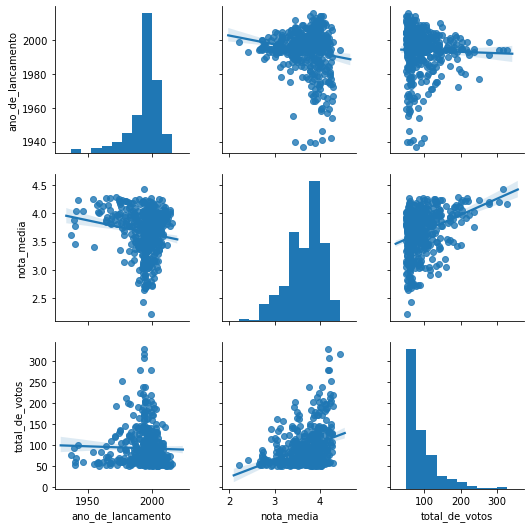

In [318]:
# solução
infos = filmes[['ano_de_lancamento','nota_media','total_de_votos']]
ax = sns.pairplot(infos,kind='reg')

## Pergunta: analise um pairplot dos filmes de `Animation`

- use o dataframe `filmes`
- em um único pairplot separe com cores distintas os filmes da categoria `Animation` dos outros
- use uma palete como `husl`
- use marcadores distintos para cada um dos dois grupos
- faça o pairplot usando seaborn e coloque uma regressão linear para cada pequeno plot dentro dele
- tanto em x quanto y use somente três variáveis: `total_de_votos`, `ano_de_lancamento`, `nota_media`

In [319]:
infos = filmes[['ano_de_lancamento','nota_media','total_de_votos','Animation']]
infos

,ano_de_lancamento,nota_media,total_de_votos,Animation
filmeId,,,,
1,1995.0,3.920930,215.0,1
2,1995.0,3.431818,110.0,0
3,1995.0,3.259615,52.0,0
6,1995.0,3.946078,102.0,0
7,1995.0,3.185185,54.0,0
...,...,...,...,...
109374,2014.0,3.778846,52.0,0
109487,2014.0,3.993151,73.0,0
112852,2014.0,4.050847,59.0,0


<Figure size 1440x576 with 0 Axes>

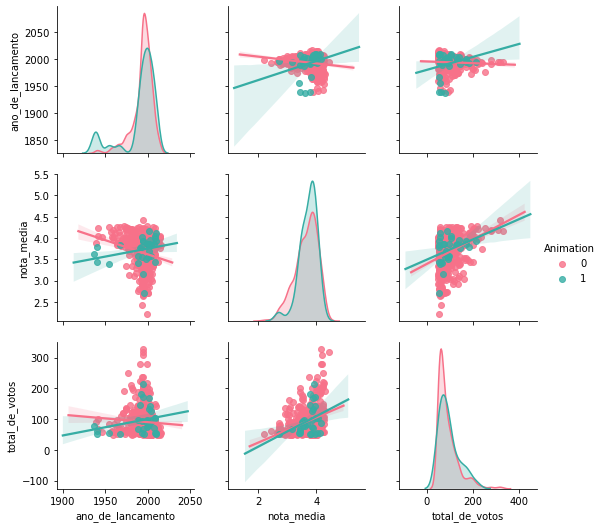

In [320]:
plt.figure(figsize=(20,8))
ax = sns.pairplot(infos,kind='reg',hue='Animation',palette='husl'
                  ,vars=['ano_de_lancamento','nota_media','total_de_votos']
                 ,hue_order=[0,1])

## Pergunta: Analise a regressão em relação ao ano de lançamento.

- Como parece se comportar a `nota_media` de filmes de `Animation` mais antigos e mais recentes? (ano_de_lancamento x nota_media). Essa correlação parece ser baixa, mas parece ser linear?
- E o `ano_de_lancamento` x `total_de_votos`?
- E das outras categorias? Compare isso com os outros filmes.
- O que leva você levantar como hipótese para esse resultado?

### Solução:



#### Como parece se comportar a `nota_media `de filmes de Animation mais antigos e mais recentes? (`ano_de_lancamento x nota_media`). Essa correlação parece ser baixa, mas parece ser linear?    

Text(0.5, 1.0, 'Ano de lançamento x nota média, antes da década de 1990 correlação de -0.305')

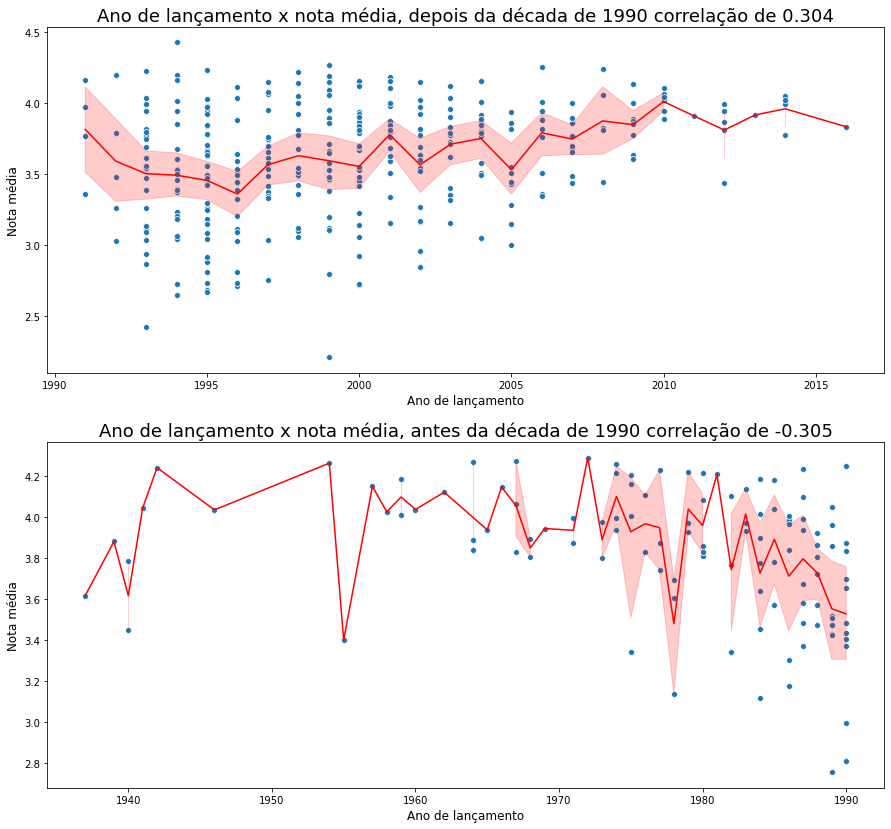

In [321]:
ano_lan_sim = []
total_votos_sim = []
ano_lan_nao = []
total_votos_nao = []

for i in range(len(filmes[['nota_media','ano_de_lancamento']])):
    if filmes[['nota_media','ano_de_lancamento']].iloc[i].values[1] > 1990:
        ano_lan_sim.append(filmes['ano_de_lancamento'].iloc[i])
        total_votos_sim.append(filmes['nota_media'].iloc[i])
    else:
        ano_lan_nao.append(filmes['ano_de_lancamento'].iloc[i])
        total_votos_nao.append(filmes['nota_media'].iloc[i])
        
decada_de_90_pra_frente = pd.DataFrame({'Ano_lancamento':ano_lan_sim,'nota_media':total_votos_sim})
decada_de_90_pra_tras = pd.DataFrame({'Ano_lancamento':ano_lan_nao,'nota_media':total_votos_nao})


plt.figure(figsize=(15,14))
plt.subplot(211)
ax1 = sns.scatterplot(x="Ano_lancamento",y="nota_media",data=decada_de_90_pra_frente)
ax1 = sns.lineplot(x="Ano_lancamento",y="nota_media",data=decada_de_90_pra_frente,color='red')
corr_depois_decada_1990 = decada_de_90_pra_frente.corr()['nota_media'].values[0].round(3)
ax1.set_xlabel('Ano de lançamento', fontsize=12)
ax1.set_ylabel('Nota média', fontsize=12)
ax1.set_title('Ano de lançamento x nota média, depois da década de 1990 correlação de %.3f' % 
              corr_depois_decada_1990,fontsize=18)

plt.subplot(212)
ax2 = sns.scatterplot(x="Ano_lancamento",y="nota_media",data=decada_de_90_pra_tras)
ax2 = sns.lineplot(x="Ano_lancamento",y="nota_media",data=decada_de_90_pra_tras,color='red')
corr_antes_decada_1990 = decada_de_90_pra_tras.corr()['nota_media'].values[0].round(3)
ax2.set_xlabel('Ano de lançamento', fontsize=12)
ax2.set_ylabel('Nota média', fontsize=12)
ax2.set_title('Ano de lançamento x nota média, antes da década de 1990 correlação de %.3f' % 
              corr_antes_decada_1990,fontsize=18)


Quando se plota todos os valores vemos que os anos mais passados possuem pouca quantidade de filmes, logo podemos ver uma **correlação negativa** entre **ano_de_lancamento x nota_media** já se pegamos os dados a partir da **década de 1990** vemos que as notas médias possuem **correlação positiva** com o ano de lançamento do filme.

#### E o ano_de_lancamento x total_de_votos?

Text(0.5, 1.0, 'Ano de lançamento x total de votos, antes da década de 1990 correlação de 0.218')

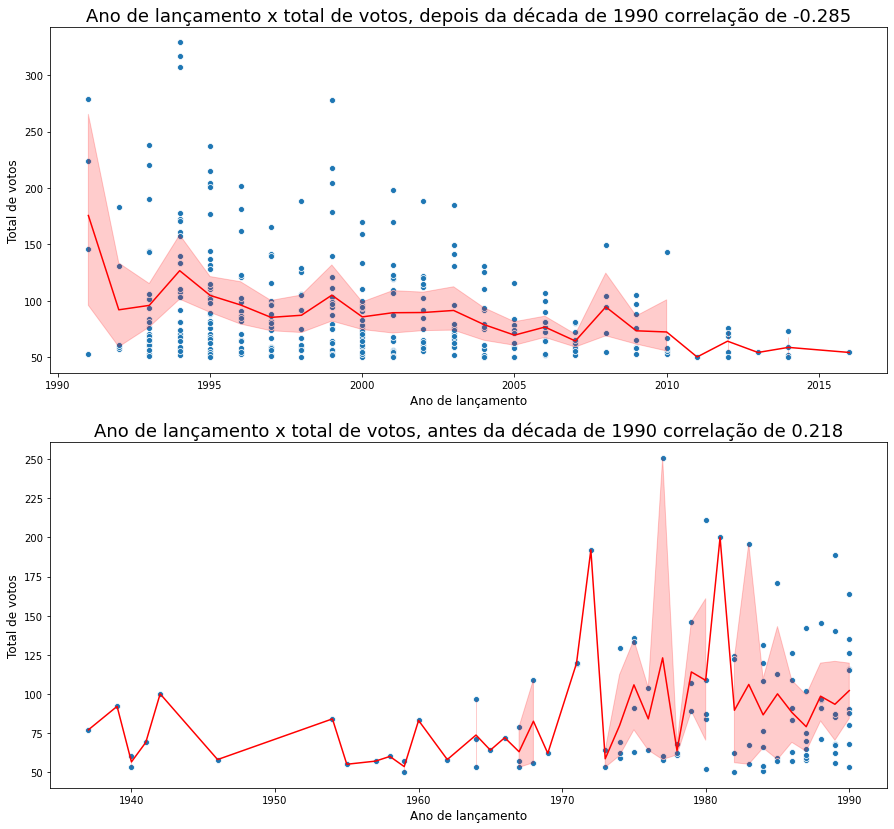

In [322]:
ano_lan_sim = []
total_votos_sim = []
ano_lan_nao = []
total_votos_nao = []

for i in range(len(filmes[['total_de_votos','ano_de_lancamento']])):
    if filmes[['total_de_votos','ano_de_lancamento']].iloc[i].values[1] > 1990:
        ano_lan_sim.append(filmes['ano_de_lancamento'].iloc[i])
        total_votos_sim.append(filmes['total_de_votos'].iloc[i])
    else:
        ano_lan_nao.append(filmes['ano_de_lancamento'].iloc[i])
        total_votos_nao.append(filmes['total_de_votos'].iloc[i])
        
decada_de_90_pra_frente = pd.DataFrame({'Ano_lancamento':ano_lan_sim,'total_de_votos':total_votos_sim})
decada_de_90_pra_tras = pd.DataFrame({'Ano_lancamento':ano_lan_nao,'total_de_votos':total_votos_nao})


plt.figure(figsize=(15,14))
plt.subplot(211)
ax1 = sns.scatterplot(x="Ano_lancamento",y="total_de_votos",data=decada_de_90_pra_frente)
ax1 = sns.lineplot(x="Ano_lancamento",y="total_de_votos",data=decada_de_90_pra_frente,color='red')
corr_depois_decada_1990 = decada_de_90_pra_frente.corr()['total_de_votos'].values[0].round(3)
ax1.set_xlabel('Ano de lançamento', fontsize=12)
ax1.set_ylabel('Total de votos', fontsize=12)
ax1.set_title('Ano de lançamento x total de votos, depois da década de 1990 correlação de %.3f' % 
              corr_depois_decada_1990,fontsize=18)

plt.subplot(212)
ax2 = sns.scatterplot(x="Ano_lancamento",y="total_de_votos",data=decada_de_90_pra_tras)
ax2 = sns.lineplot(x="Ano_lancamento",y="total_de_votos",data=decada_de_90_pra_tras,color='red')
corr_antes_decada_1990 = decada_de_90_pra_tras.corr()['total_de_votos'].values[0].round(3)
ax2.set_xlabel('Ano de lançamento', fontsize=12)
ax2.set_ylabel('Total de votos', fontsize=12)
ax2.set_title('Ano de lançamento x total de votos, antes da década de 1990 correlação de %.3f' % 
              corr_antes_decada_1990,fontsize=18)


Quando se plota todos os valores vemos que os anos mais passados possuem pouca quantidade de filmes, logo podemos ver uma **correlação positiva** entre **ano_de_lancamento x total_de_votos** já se pegarmos os dados a partir da **década de 1990** vemos que as notas médias possuem **correlação negativa** com o ano de lançamento do filme.


<span style="color:red">**Creio que esse gráficos já respondem as outras perguntas, pois estou analisando todos os filmes, logo caso colocassem apenas algumas categorias poderia chegar a conclusões erradas devido alguns possuirem poucos dados**</span>.

## Pergunta: Explore

- compartilhe conosco 2 visualizações extras que julgar interessante
- explique o que encontrou
- use quantas células (texto ou código) julgar necessário

### Solução

Primeiro, são os graficos da questão anterior, algo ocorreu que a partir da década de 1990 (pelo gráfico, em 1994 especificamente) aumentasse o número de filmes.

# <span style="color:blue" >Análise das 5 melhores categorias</span>

In [323]:
df_popularidade.sort_values('Frequencia',ascending=False).head()

,Genero,Frequencia,total_de_votos,Voto/Filme
4,Comedy,181,15330.0,84.696133
7,Drama,166,15445.0,93.042169
0,Action,164,15734.0,95.939024
1,Adventure,132,13117.0,99.371212
16,Thriller,121,11907.0,98.404959


Os filmes de comédia são os pior avaliado dentre as 5 melhores categorias

In [324]:
def decada_de_90(dados): 
    ano_lan_sim = []
    total_votos_sim = []
    ano_lan_nao = []
    total_votos_nao = []

    for i in range(len(dados[['total_de_votos','ano_de_lancamento']])):
        if dados[['total_de_votos','ano_de_lancamento']].iloc[i].values[1] > 1990:
            ano_lan_sim.append(dados['ano_de_lancamento'].iloc[i])
            total_votos_sim.append(dados['total_de_votos'].iloc[i])
        else:
            ano_lan_nao.append(dados['ano_de_lancamento'].iloc[i])
            total_votos_nao.append(dados['total_de_votos'].iloc[i])

    decada_de_90_pra_frente = pd.DataFrame({'Ano_lancamento':ano_lan_sim,'total_de_votos':total_votos_sim})
    decada_de_90_pra_tras = pd.DataFrame({'Ano_lancamento':ano_lan_nao,'total_de_votos':total_votos_nao})
    return decada_de_90_pra_frente,decada_de_90_pra_tras

In [325]:
filmes_de_comedia  = filmes[['titulo','ano_de_lancamento','nota_media','total_de_votos','Comedy']].query('Comedy==1')
filmes_de_drama    = filmes[['titulo','ano_de_lancamento','nota_media','total_de_votos','Drama']].query('Drama==1')
filmes_de_acao     = filmes[['titulo','ano_de_lancamento','nota_media','total_de_votos','Action']].query('Action==1')
filmes_de_aventura = filmes[['titulo','ano_de_lancamento','nota_media','total_de_votos','Adventure']].query('Adventure==1')
filmes_de_terror   = filmes[['titulo','ano_de_lancamento','nota_media','total_de_votos','Thriller']].query('Thriller==1')

In [326]:
comedia_depois_90,comedia_antes_90 = decada_de_90(filmes_de_comedia)
drama_depois_90,drama_antes_90 = decada_de_90(filmes_de_drama)
acao_depois_90,acao_antes_90 = decada_de_90(filmes_de_acao)
aventura_depois_90,aventura_antes_90 = decada_de_90(filmes_de_aventura)
terror_depois_90,terror_antes_90 = decada_de_90(filmes_de_terror)

In [327]:
rank_de_votos_depois_90 = pd.DataFrame({'Categoria':['Comédia','Drama','Ação','Aventura','Terror'],
                                       'Total_de_votos':[comedia_depois_90['total_de_votos'].sum(),
                                                         drama_depois_90['total_de_votos'].sum(),
                                                         acao_depois_90['total_de_votos'].sum(),
                                                         aventura_depois_90['total_de_votos'].sum(),
                                                         terror_depois_90['total_de_votos'].sum()] })
rank_de_votos_depois_90.sort_values('Total_de_votos',ascending=False)

,Categoria,Total_de_votos
1,Drama,12098.0
2,Ação,12056.0
0,Comédia,11561.0
4,Terror,10165.0
3,Aventura,9749.0


A categoria **Drama** é a mais votada a partir da década de 1990, mas também os filmes de **Ação** que estão em segundo estão com pouca diferença neste rank

In [328]:
rank_de_votos_antes_90 = pd.DataFrame({'Categoria':['Comédia','Drama','Ação','Aventura','Terror'],
                                       'Total_de_votos':[comedia_antes_90['total_de_votos'].sum(),
                                                         drama_antes_90['total_de_votos'].sum(),
                                                         acao_antes_90['total_de_votos'].sum(),
                                                         aventura_antes_90['total_de_votos'].sum(),
                                                         terror_antes_90['total_de_votos'].sum()] })
rank_de_votos_antes_90.sort_values('Total_de_votos',ascending=False)

,Categoria,Total_de_votos
0,Comédia,3769.0
2,Ação,3678.0
3,Aventura,3368.0
1,Drama,3347.0
4,Terror,1742.0


Já antes da década de 1990, a categoria **comédia** é estava na liderança, além disso, os filmes de **ação** também ficaram na segunda posião com uma pequena difernça.